Alexandra Coffin:
2023/2/19:
Data Analytics:
Dr. Case:
Mod. 6 Showcase

# About:
Formula 1 is considered one of the most technically advanced forms of racing on the planet. It combines the power of a v6 turbo with a electric motor and aerodynamics that rival those of the aerospace industry. Coined as one of the hotbeds for technical developement for the industry, its no wonder that these multimillion dollar cars are the envy of all, especially when the estimated top speed is 360 km per hour with the ability to go 0 to 100 in 2.6 seconds. 

To determine the impact of technology on Formula 1 teams we will be examining it through the following:
* Points
* Fastest Lap Speeds
* Fastest Lap Times in milliseconds
* Race Speeds by Constructor
* Race Speeds by Driver

The lights are our, and away we go!

### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats


# 1. The Data:
For this workbook the data has been pulled from https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020. It's a collection of data that spans from 1950 to 2020. Some pages have been modified due to complexity. I will be using the results_2012_2022.csv which is a modified form of the original csv file from the set. I wanted to review the last 10 seasons as these where the largest technical advancements have occured.

## Selecting Data Points:
In this case it was easier to selected specific races and place them in a seperate csv to examine the past decade of racing. It allows for an easier manipulation of data that applies to our interest. There is a major difference in set size, in addition to the age of the data. 

In [2]:
df_results_Origin = pd.read_csv('results.csv', index_col=0)
df_results = pd.read_csv('results_2012_2022.csv', index_col=0)
df_circuits = pd.read_csv('circuits.csv', index_col=0)

In [3]:
Origin = len(df_results_Origin)
print(Origin)

25840


In [4]:
New = len(df_results)
print(New)

4585


In [5]:
difference = Origin - New
print(difference)

21255


In [6]:
len(df_results.columns)

19

## Viewing top 10
This will show the first 10 entires of the csv, in this case the 2009 Australia Grand Prix, which was won by Jensen Button.These represent the 2009 Austrailian Grandprix, these results were obtained when the standard F1 car used a V10.

In [7]:
df_results.head(10)

,raceId,date,driverId,constructorId,number,grid,track,position,positionTeNaNt,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,,,
21232,860,3/18/2012,Button,Mclaren,3,2,Sepang,1.0,1,1,25.0,58,34:09.6,5649565.0,56.0,1,01:29.2,214.053,1
21233,860,3/18/2012,Vettel,Red_Bull,1,6,Monaco,2.0,2,2,18.0,58,2.139,5651704.0,57.0,2,01:29.4,213.503,1
21234,860,3/18/2012,Hamilton,Mclaren,4,1,Melbourn,3.0,3,3,15.0,58,4.075,5653640.0,57.0,4,01:29.5,213.214,1
21235,860,3/18/2012,Webber,Red_Bull,2,5,Istanbul,4.0,4,4,12.0,58,4.547,5654112.0,57.0,3,01:29.4,213.452,1
21236,860,3/18/2012,Alonso,Ferrari,5,12,Velencia,5.0,5,5,10.0,58,21.565,5671130.0,52.0,7,01:30.3,211.469,1
21237,860,3/18/2012,Kobauashi,Sauber,14,13,Spa,6.0,6,6,8.0,58,36.766,5686331.0,55.0,10,01:30.6,210.668,1
21238,860,3/18/2012,Raikkonen,Lotus_F1,9,17,Shanghai,7.0,7,7,6.0,58,38.014,5687579.0,50.0,11,01:30.8,210.346,1
21239,860,3/18/2012,Perez,Sauber,15,22,Suzuka,8.0,8,8,4.0,58,39.458,5689023.0,46.0,12,01:30.8,210.151,1
21240,860,3/18/2012,Riccardo,Toro_Rosso,16,10,Hockenhein,9.0,9,9,2.0,58,39.556,5689121.0,53.0,8,01:30.6,210.733,1


## Viewing the bottom 10 lines:
RaceID 1096 represents the results from the 2022 Abu Dhabi Grand Prix, which was won by Max Verstappen.

In [8]:
df_results.tail(10)

,raceId,date,driverId,constructorId,number,grid,track,position,positionTeNaNt,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,,,
25836,1096,11/20/2022,Tsunoda,Alphatauri,22,11,Budapest,11.0,11,11,0.0,58,+1:29.371,5355285.0,40.0,7,01:29.5,212.446,1
25837,1096,11/20/2022,Zhou,Alfa,24,15,Singapore,12.0,12,12,0.0,57,NaN,NaN,53.0,8,01:29.6,212.183,11
25838,1096,11/20/2022,Albon,Williams,23,19,Indianapolis,13.0,13,13,0.0,57,NaN,NaN,40.0,13,01:29.9,211.383,11
25839,1096,11/20/2022,Hartley,Alphatauri,10,17,Shanghai,14.0,14,14,0.0,57,NaN,NaN,16.0,19,01:31.1,208.732,11
25840,1096,11/20/2022,Bottas,Alfa,77,18,Interlagos,15.0,15,15,0.0,57,NaN,NaN,47.0,16,01:30.4,210.417,11
25841,1096,11/20/2022,M. Schumacher,Haas,47,12,Velencia,16.0,16,16,0.0,57,NaN,NaN,39.0,12,01:29.8,211.632,11
25842,1096,11/20/2022,Magnussen,Haas,20,16,Fuji,17.0,17,17,0.0,57,NaN,NaN,40.0,20,01:31.2,208.556,11
25843,1096,11/20/2022,Hamilton,Mercedes,44,5,Istanbul,18.0,18,18,0.0,55,NaN,NaN,42.0,11,01:29.8,211.738,6
25844,1096,11/20/2022,Latifi,Williams,6,20,nurburgring,19.0,19,19,0.0,55,NaN,NaN,45.0,14,01:30.3,210.517,130


# 2. Describing results
Please note due to set size driver Ids have been transformed to numbers, this allows for the data to be easier to work with.To remove cells that do not contain valid data, \N was replaced with NaN and a filter was applied to get results for milliseconds, fastest lap speed.

In [9]:
df_results.describe()

,raceId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId
count,4585.000000,4585.000000,4585.000000,3841.000000,4585.000000,4585.000000,4585.000000,2.324000e+03,4384.000000,4585.000000,4384.000000,4585.000000
mean,975.220284,23.735660,10.755943,9.376725,10.963795,4.873173,53.253217,5.946611e+06,45.292427,10.122137,203.002612,9.889204
std,69.357327,22.805516,6.132764,5.277899,6.087889,7.170846,18.055476,1.183700e+06,15.169069,6.163062,21.244653,21.181597
min,860.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.070710e+05,2.000000,0.000000,100.615000,1.000000
25%,911.000000,8.000000,5.000000,5.000000,6.000000,0.000000,51.000000,5.412602e+06,38.000000,5.000000,191.990250,1.000000
50%,976.000000,17.000000,11.000000,9.000000,11.000000,0.000000,56.000000,5.757494e+06,48.000000,10.000000,203.537500,1.000000
75%,1033.000000,28.000000,16.000000,14.000000,16.000000,8.000000,66.000000,6.185553e+06,55.000000,15.000000,216.496500,11.000000
max,1096.000000,99.000000,24.000000,23.000000,24.000000,50.000000,87.000000,1.101210e+07,85.000000,24.000000,255.014000,141.000000


## 2.1 Describe points
For each place in the top 10 of the grid, racers are awarded points. According to the data from 2012 to 2022 the average number of points earned was 4.867. The thing that is interesting about this set is that there are extremes in the data. Where speed is still of interest, points are the ability of a driver to get their team into a competative position. In this case it isn't until we reach 75% that we see 8 points as possible with the max of 50 points, which shows a clear seperation of high performing teams to lower performing teams. 

In [10]:
df_results[df_results['points'].notnull()]
df_results.points.describe()

count    4585.000000
mean        4.873173
std         7.170846
min         0.000000
25%         0.000000
50%         0.000000
75%         8.000000
max        50.000000
Name: points, dtype: float64

## 2.2 Describing Speeds
Durring F1 races there is an extra point awarded to the driver that completes the fastes lap on track during the race, and breaks a course record. In this instance I will be using the average speed from the fastest laps recorded to do a comparison.

In [11]:
df_results[df_results['fastestLapSpeed'].notnull()]
df_results.fastestLapSpeed.describe()

count    4384.000000
mean      203.002612
std        21.244653
min       100.615000
25%       191.990250
50%       203.537500
75%       216.496500
max       255.014000
Name: fastestLapSpeed, dtype: float64

While the mean speed is 203, our interest is in the top speeds that are found and the average of these top speeds. In this specific series, the highest speed is 255.01 km/hr, but we are also interested in the number of times that a car had reached within the 75th precentile, in this case over 216 km/hr. Based on the results there are 1143 rows of data containing instances where the fastest lap speed was greater than or equal to 216 km/hr.


In [12]:
df_results[df_results['fastestLapSpeed'].notnull()]
df_results[(df_results['fastestLapSpeed'] >= 216)]

,raceId,date,driverId,constructorId,number,grid,track,position,positionTeNaNt,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,,,
21424,868,7/8/2012,Webber,Red_Bull,2,2,Sepang,1.0,1,1,25.0,52,25:11.3,5111288.0,49.0,4,01:34.9,223.393,1
21425,868,7/8/2012,Alonso,Ferrari,5,1,Melbourn,2.0,2,2,18.0,52,3.06,5114348.0,49.0,7,01:35.4,222.336,1
21426,868,7/8/2012,Vettel,Red_Bull,1,4,Catalunya,3.0,3,3,15.0,52,4.836,5116124.0,52.0,3,01:34.9,223.480,1
21427,868,7/8/2012,Massa,Ferrari,6,5,Istanbul,4.0,4,4,12.0,52,9.519,5120807.0,50.0,5,01:35.0,223.141,1
21428,868,7/8/2012,Raikkonen,Lotus_F1,9,6,Monaco,5.0,5,5,10.0,52,10.314,5121602.0,50.0,1,01:34.7,224.037,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25721,1089,8/28/2022,Magnussen,Haas,20,16,Fuji,16.0,16,16,0.0,52,NaN,NaN,37.0,16,01:26.8,240.268,11
25722,1089,8/28/2022,Riccardo,Mclaren,3,4,Catalunya,NaN,R,17,0.0,45,NaN,NaN,39.0,12,01:26.6,240.809,44
25723,1089,8/28/2022,Stroll,Astin_Martin,18,12,Velencia,NaN,R,18,0.0,39,NaN,NaN,34.0,19,01:27.5,238.430,5


Creating a list to use for later comparison to determine which teams have the best cars. 

In [13]:
speed_list = (df_results.fastestLapSpeed)
speed_list

resultId
21232    214.053
21233    213.503
21234    213.214
21235    213.452
21236    211.469
          ...   
25841    211.632
25842    208.556
25843    211.738
25844    210.517
25845    209.889
Name: fastestLapSpeed, Length: 4585, dtype: float64

## 2.3 Describing milliseconds:
Races can be so tight that every millisecond counts, especially when the average speed of a car is 230 km/hr. In F1 milliseconds are commonly used in palce of minutes especially when comparing performance. The mean of racing milliseconds is an incredible 5.945e+03, but the most impressive is actually the max of 1.101e+07, which refers to a car performing at peak performance during a fastest lap.

In [14]:
pd.set_option('display.precision', 6)
df_results[df_results['milliseconds'].notnull()]
df_results.milliseconds.describe()

count    2.324000e+03
mean     5.946611e+06
std      1.183700e+06
min      2.070710e+05
25%      5.412602e+06
50%      5.757494e+06
75%      6.185553e+06
max      1.101210e+07
Name: milliseconds, dtype: float64

# 3. The Teams:

In [15]:
df_results.constructorId

resultId
21232     Mclaren
21233    Red_Bull
21234     Mclaren
21235    Red_Bull
21236     Ferrari
           ...   
25841        Haas
25842        Haas
25843    Mercedes
25844    Williams
25845      Alpine
Name: constructorId, Length: 4585, dtype: object

In [16]:
df_results['constructorId'].describe()

count        4585
unique         20
top       Mclaren
freq          440
Name: constructorId, dtype: object

In [17]:
df_results['constructorId'].unique()

array(['Mclaren', 'Red_Bull', 'Ferrari', 'Sauber', 'Lotus_F1',
       'Toro_Rosso', 'Force_India', 'Mercedes', 'Williams', 'Marussia',
       'Caterham', 'HRT', 'Manor', 'Haas', 'Renault', 'Alfa',
       'Racing_Point', 'Alphatauri', 'Astin_Martin', 'Alpine'],
      dtype=object)

In [18]:
df_results['constructorId'].value_counts()

Mclaren         440
Ferrari         440
Mercedes        440
Williams        440
Red_Bull        440
Toro_Rosso      320
Haas            286
Sauber          278
Force_India     278
Renault         200
Alfa            162
Lotus_F1        154
Alphatauri      120
Caterham        112
Marussia        109
Astin_Martin     86
Alpine           86
Manor            78
Racing_Point     76
HRT              40
Name: constructorId, dtype: int64

In [19]:
team_list = (df_results.constructorId)
team_list

resultId
21232     Mclaren
21233    Red_Bull
21234     Mclaren
21235    Red_Bull
21236     Ferrari
           ...   
25841        Haas
25842        Haas
25843    Mercedes
25844    Williams
25845      Alpine
Name: constructorId, Length: 4585, dtype: object

The teams with the largest number of Fastest Laps recorded are Mclaren, Ferrari, Mercedes, Williams and Red_Bull, with 440 entries each. This is interesting as you can see the big three on the list: Ferrari, Mercedes and Red_Bull. The interesting pair is actually Mclaren and Williams, both of which recently have been struggling with their cars in terms of pole during qualifying. However, when looking at the number of times that they are featured as a quick team, its impressive to see them there.
  
  * It is also surprising to see Astin_Martin on the list as they have only recently returned to the sport.
  * Toro_Rosso and Alphatauri have been seperated due to engine manufacturers, as the team change who they purchased the engine from.


### Visualization of team Data for Fastest Laps

<AxesSubplot:xlabel='constructorId', ylabel='count'>

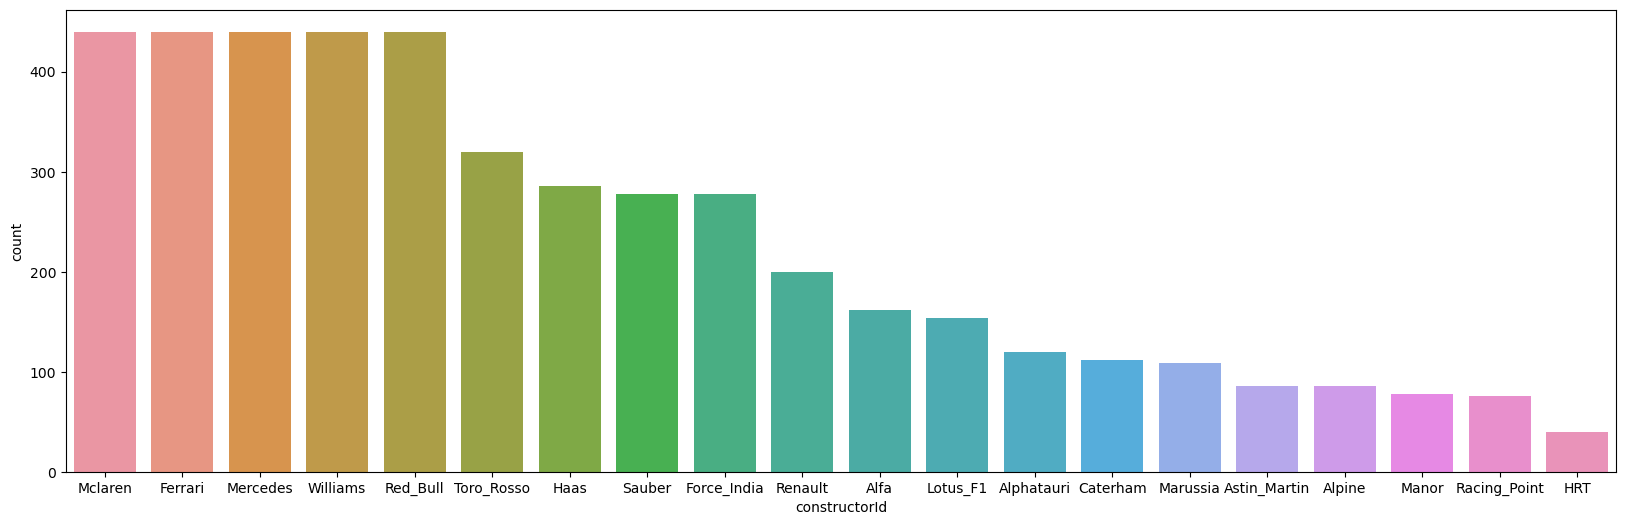

In [20]:
# BONUS: using Seaborn for graphs
plt.figure(figsize=(20,6))
sns.countplot(x='constructorId', data=df_results, order=df_results['constructorId'].value_counts().index)

# Histograms
While there appears to be a large amount of data available, in this case there are several numbers that are used to reference other csv files, such as driverID, constructorID, Grid, Position, and PositionOrder. To continue our discussion on the effect of technology and speed we first have to examine what the range of lap speeds, milliseconds, laps, and points.

<AxesSubplot:xlabel='fastestLapSpeed', ylabel='Count'>

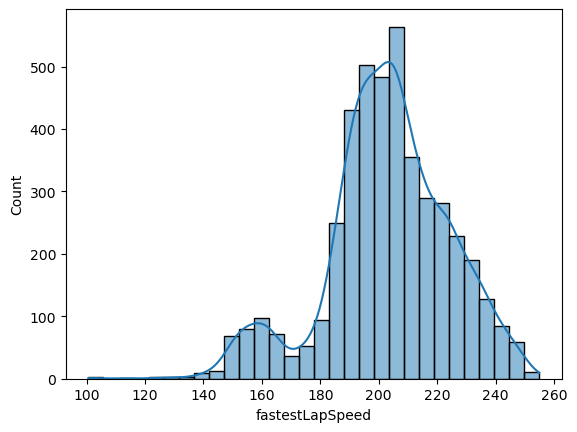

In [21]:
sns.histplot(df_results['fastestLapSpeed'], kde=True, bins=30)

<AxesSubplot:xlabel='milliseconds', ylabel='Count'>

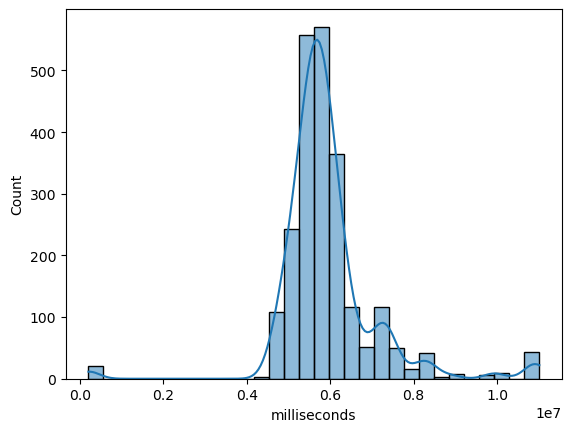

In [22]:
sns.histplot(df_results['milliseconds'], kde=True, bins=30)


<AxesSubplot:xlabel='points', ylabel='Count'>

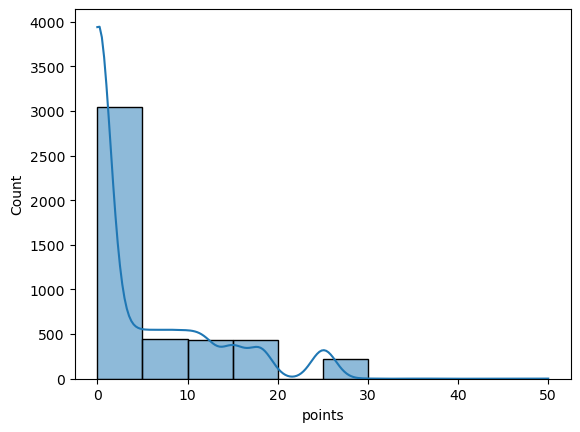

In [23]:
sns.histplot(df_results['points'], kde=True, bins = 10)


<AxesSubplot:xlabel='laps', ylabel='Count'>

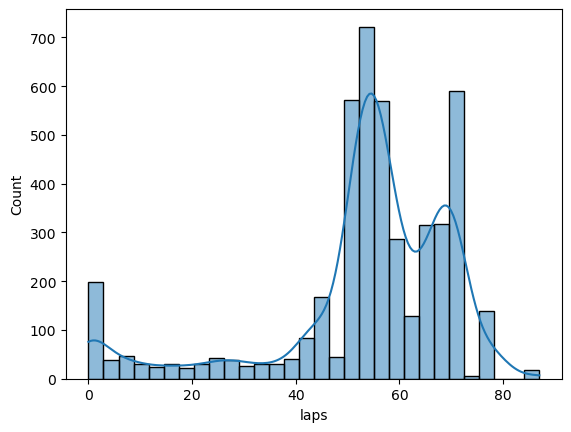

In [24]:
sns.histplot(df_results['laps'], kde=True, bins=30)

<AxesSubplot:xlabel='grid', ylabel='fastestLapSpeed'>

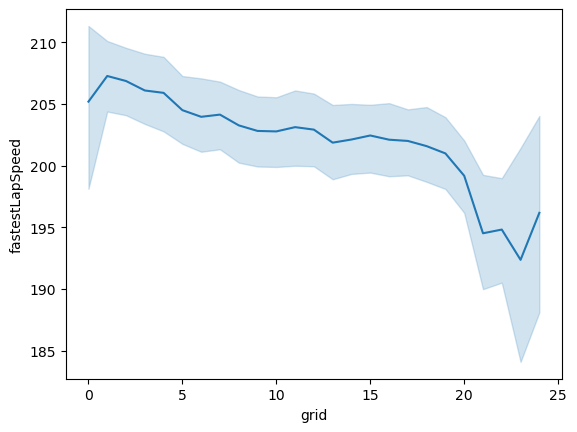

In [25]:
sns.lineplot(data=df_results, x="grid", y="fastestLapSpeed")

This graph breaks down fastest lap times based on grids, which are different circuts. Formula 1 tracks are all different in terms of the type of circute. Some are made for speed such as Silver Stone home to the British Grand Prix, while others are focused on handling, such as the Monaco Grand Prix.

### Track Key:

In [26]:
df_circuits.head(10)

,circuitRef,name,location,country,lat,lng,alt
circuitId,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130
6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7
7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13
8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228
9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153


In [27]:
df_circuits.tail(10)

,circuitRef,name,location,country,lat,lng,alt
circuitId,,,,,,,
68,buddh,Buddh International Circuit,Uttar Pradesh,India,28.3487,77.5331,194
69,americas,Circuit of the Americas,Austin,USA,30.1328,-97.6411,161
70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.7647,678
71,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2
73,baku,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7
75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.2270,-8.6267,108
76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.9975,11.3719,255
77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044,15
78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,\N


This is not the whole list of possible tracks, however it contains a majority of the tracks that have been within the last 10 years. Some of these tracks have been retired for safety reasons. 

# 4. Comparing Drivers:
Using Value_counts() and Len() builtin functions to calculte the precentage of drivers from the top 5 teams and lowest 4 teams.

In [28]:
perc_Mercedes = ((df_results['constructorId'].value_counts()['Mercedes'])/len(df_results['constructorId']))*100
perc_Ferrari = ((df_results['constructorId'].value_counts()['Ferrari'])/len(df_results['constructorId']))*100
perc_Red_Bull = ((df_results['constructorId'].value_counts()['Red_Bull'])/len(df_results['constructorId']))*100
perc_Mclaren = ((df_results['constructorId'].value_counts()['Mclaren'])/len(df_results['constructorId']))*10
perc_Williams = ((df_results['constructorId'].value_counts()['Williams'])/len(df_results['constructorId']))*100
perc_HRT = ((df_results['constructorId'].value_counts()['HRT'])/len(df_results['constructorId']))*100
perc_Racing_Point = ((df_results['constructorId'].value_counts()['Racing_Point'])/len(df_results['constructorId']))*100
perc_Manor = ((df_results['constructorId'].value_counts()['Manor'])/len(df_results['constructorId']))*100
perc_Alpine = ((df_results['constructorId'].value_counts()['Alpine'])/len(df_results['constructorId']))*100

top5_sum=0
for x in [perc_Mercedes, perc_Ferrari, perc_Red_Bull, perc_Mclaren, perc_Williams]:
    top5_sum = top5_sum + x

print(f'{perc_Mercedes:.1f}% of Fastest Laps come from team Mercedes.')
print(f'{perc_Ferrari:.1f}% of Fastest Laps come from team Ferrari.')
print(f'{perc_Red_Bull:.1f}% of Fastest Laps come from team Red Bull.')
print(f'{perc_Williams:.1f}% of Fastest Laps come from Williams.')
print(f'{perc_Mclaren:.1f}% of Fastest Laps come from Mclaren.')
print()
print(f'Sum of all top 5 teams with the largest numbers of Fastest laps (Mercedes, Ferrari, Red_Bull, Mclaren, and Williams) is {top5_sum:.0f}%.')
print()
bottom5_sum=0
for y in [perc_HRT, perc_Racing_Point, perc_Manor, perc_Alpine]:
    bottom5_sum = bottom5_sum + y

print(f'{perc_HRT:.1f}% of Fastest Laps come from team HRT.')
print(f'{perc_Racing_Point:.1f}% of Fastest Laps come from team Racing_Point.')
print(f'{perc_Manor:.1f}% of Fastest Laps come from Manor.')
print(f'{perc_Alpine:.1f}% of Fastest Laps come from Alpine.')
print()
print(f'Sum of all bottom 5 teams with the largest numbers of Fastest laps (HRT, Racing Point, Manor, and Alpine) is {bottom5_sum:.0f}%.')

9.6% of Fastest Laps come from team Mercedes.
9.6% of Fastest Laps come from team Ferrari.
9.6% of Fastest Laps come from team Red Bull.
9.6% of Fastest Laps come from Williams.
1.0% of Fastest Laps come from Mclaren.

Sum of all top 5 teams with the largest numbers of Fastest laps (Mercedes, Ferrari, Red_Bull, Mclaren, and Williams) is 39%.

0.9% of Fastest Laps come from team HRT.
1.7% of Fastest Laps come from team Racing_Point.
1.7% of Fastest Laps come from Manor.
1.9% of Fastest Laps come from Alpine.

Sum of all bottom 5 teams with the largest numbers of Fastest laps (HRT, Racing Point, Manor, and Alpine) is 6%.


## 5. Calculating performance based on Speed both Teams and Drivers:
To do this we will combine the data gathered as teams with Speeds in order to see the relationship between team strenght in speed. Not all races are won through speed, however it is important to note that this will show the division between teams that rely on speed and teams that rely on handling.

In [29]:
drivers_list = (df_results.driverId)

In [30]:
zip_results = list(zip(team_list, speed_list))
zip_drivers = list(zip(drivers_list, speed_list))

In [31]:
team_speed_df = pd.DataFrame(zip_results, columns=['constructorId', 'fastestLapSpeeds'])
team_speed_df

,constructorId,fastestLapSpeeds
0,Mclaren,214.053
1,Red_Bull,213.503
2,Mclaren,213.214
3,Red_Bull,213.452
4,Ferrari,211.469
...,...,...
4580,Haas,211.632
4581,Haas,208.556
4582,Mercedes,211.738
4583,Williams,210.517


In [32]:
team_points_perf = team_speed_df['fastestLapSpeeds'].groupby(team_speed_df['constructorId'])

In [33]:
team_points_perf.mean()

constructorId
Alfa            208.662153
Alphatauri      209.858770
Alpine          207.263892
Astin_Martin    207.838735
Caterham        192.558755
Ferrari         205.412537
Force_India     200.085777
HRT             191.882541
Haas            205.701280
Lotus_F1        195.407336
Manor           191.736778
Marussia        193.352305
Mclaren         202.925229
Mercedes        206.589710
Racing_Point    212.222111
Red_Bull        205.647343
Renault         204.992335
Sauber          197.925479
Toro_Rosso      199.712055
Williams        202.331927
Name: fastestLapSpeeds, dtype: float64

In [34]:
final_team_points_perf_df = pd.DataFrame(team_points_perf.mean())
final_team_points_perf_df.sort_values(by=['fastestLapSpeeds'], ascending=False)

,fastestLapSpeeds
constructorId,
Racing_Point,212.222111
Alphatauri,209.858770
Alfa,208.662153
Astin_Martin,207.838735
Alpine,207.263892
Mercedes,206.589710
Haas,205.701280
Red_Bull,205.647343
Ferrari,205.412537


## 6. The Drivers Speeds Comparison:

In [35]:
driver_speed_df = pd.DataFrame(zip_drivers, columns=['driverId', 'fastestLapSpeeds'])
driver_speed_df

,driverId,fastestLapSpeeds
0,Button,214.053
1,Vettel,213.503
2,Hamilton,213.214
3,Webber,213.452
4,Alonso,211.469
...,...,...
4580,M. Schumacher,211.632
4581,Magnussen,208.556
4582,Hamilton,211.738
4583,Latifi,210.517


In [36]:
driver_performance = driver_speed_df['fastestLapSpeeds'].groupby(driver_speed_df['driverId'])

In [37]:
driver_performance.mean()

driverId
Aiken         222.240000
Albon         209.725140
Alonso        201.784828
B. Senna      197.809789
Bianchi       192.919125
                 ...    
Webber        199.469385
Wehrlein      195.718056
Zhou          203.629048
d'Ambrosio    235.177000
de_Vires      240.750000
Name: fastestLapSpeeds, Length: 64, dtype: float64

In [38]:
final_driver_performance_df = pd.DataFrame(driver_performance.mean())
final_driver_performance_df.sort_values(by=['fastestLapSpeeds'], ascending=False)

,fastestLapSpeeds
driverId,
de_Vires,240.750000
d'Ambrosio,235.177000
Aiken,222.240000
Norris,210.918911
Sirotkin,210.913948
...,...
Merhi,191.604000
Karthikeyan,190.464105
Stevens,189.441688


In [39]:
df_results['driverId'].value_counts()

Riccardo      220
Hamilton      219
Perez         218
Vettel        218
Bottas        200
             ... 
Fittipaldi      2
Lotterer        1
Aiken           1
d'Ambrosio      1
de_Vires        1
Name: driverId, Length: 64, dtype: int64

# Performance  Question Findings:

### Speed:
* Are speed improvements due to better tehcnology or better trained drivers?
* Are all technical advancements creating bigger speed pay offs? 
* Are sucessful teams making tradeoffs for handling rather than speed?

### Times:
* Are times imporving for teams? 
* Do teams sacrafice lap times for race longevity and performance?

When comparing the results of fastest laps in milliseconds it is important to note that the standard deviation is 1.184e06, this is a very small standard deviation especially when the min is 2.0707e05 and max of 1.101210e7 of the data are so tight. We are out of the range of seconds and into the gritty milliseconds to call race results. We would need to do more indepth research into team decisions and tradeoffs. 

### Teams:
* Which Teams are the strongest? 
* Are teams on the grid structuring to train drivers and feed them into top tier teams?
* Does speed Equate to Team Success?
    * 9.6% for Mercedes, Ferrari, Red Bull, Williams and Mclaren
    * 0.9% for HRT
    * 1.7% for Manor Racing
    * 1.7% for Racing Point
    * 1.9% for Alpine

Of the slowest teams, only Alpine remains. Manor Racing, Racing Point and HRT lef thte sport due to financial difficulties and a lack of performance. 

### Drivers:
* How much of a difference do the drivers make?
* Is it speed or stratagy?
    * On Average the most successful drivers are fast, but on average not the fastest on the track.
    * Further research into statagy is needed.


# Conclusions:

Formula 1 is a complex sport. What makes it complex is that initially we believe that speed delivers the top results, however when examing the data this isn't always the case. The best performing teams are relying on technology for more than speed. My main recomendations are:

1. Continued research into handling developments for cars, including steering and aeordynamics.
        * Alphatauri is one of the fastest teams with an average speed of 209.86 km/hr. 
2. Top tier teams have the biggest control of the races, they completed 39% of fastest laps. 
        *Smaller teams need to focus on stratagy.
3. Drivers impact team performance as much as technology, the fastes driver on averge over the decade was de_vires with an average speed of 240.75, but this result is only for a single race.
        * The driver with the largest number of Fastest Laps is Riccardo with 220 and Hamilton following with 219.
4. Over the past decade, racing speeds have greatly increased, but so has track difficulty. 

Formula 1 isn't just about speed but it's also about handling and stratagy. 39% of the top performing teams are using these ideas to better perform on race weekend. 